In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import umap.umap_ as umap

D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('haberman.data', sep=',', usecols=["Age","Patient's year of operation","Number of positive axillary nodes detected","Survival status"])
df

,Age,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


SVM

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = X.to_numpy()
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [6]:
y_pred = model.predict(X_train)

In [7]:
def rate_metrics(source_result, predicted_result):
    print('accuracy: ', accuracy_score(source_result, predicted_result))
    print('recall: ', recall_score(source_result, predicted_result, average='macro'))
    print('precision: ', precision_score(source_result, predicted_result, average='macro'))
    print('f1: ', f1_score(source_result, predicted_result, average='macro'))

In [8]:
rate_metrics(y_train, y_pred)
y_pred = model.predict(X_test)
rate_metrics(y_test, y_pred)

accuracy:  0.8073770491803278
recall:  0.6117021276595744
precision:  0.7750877192982456
f1:  0.6297659402744149
accuracy:  0.6129032258064516
recall:  0.532972972972973
precision:  0.6070175438596491
f1:  0.4723404255319149


In [9]:
model.n_support_

array([67, 55])

In [10]:
def print_best_params(classificator, params, scoring, x, y):
    gs_model = GridSearchCV(classificator, params, scoring=scoring)
    gs_model.fit(x, y)
    print(gs_model.best_params_)
print_best_params(SVC(), ({'kernel': ['linear','rbf','poly', 'sigmoid'],'C': [1, 5, 10, 50, 100, 500, 1000]}), 'accuracy',X_train, y_train)

{'C': 1, 'kernel': 'sigmoid'}


In [35]:
best_model = SVC(C=10, kernel='poly')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rate_metrics(y_test, y_pred)
y_pred

accuracy:  0.5967741935483871
recall:  0.5
precision:  0.29838709677419356
f1:  0.37373737373737376


D:\All_Projects\Programm_Projects\Projects\default-env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
def tsne(data):
    return TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data)

In [14]:
def separate_axis(data):
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    return x,y

<function matplotlib.pyplot.show(close=None, block=None)>

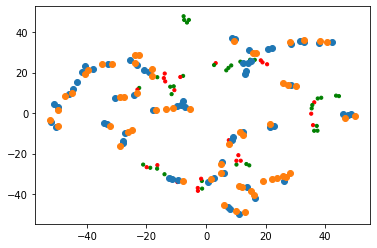

In [16]:
col = []
axis = tsne(X_test)
x,y = separate_axis(axis)
vectors = tsne(model.support_vectors_)
vector1 = vectors[:64]
vector2 = vectors[64:]

v1_x, v1_y = separate_axis(vector1)
v2_x, v2_y = separate_axis(vector2)

y_t = y_test.to_numpy()
for i in range(0,len(y_t)):
        if y_t[i] == 1:
            col.append('green')
        elif y_t[i] == 2:
            col.append('red')
        else:
            col.append('blue')

plt.figure()
plt.scatter(x,y,c=col,s=10)
plt.scatter(v1_x,v1_y)
plt.scatter(v2_x,v2_y)
plt.show

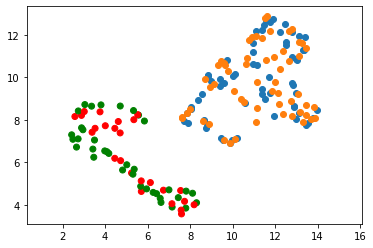

In [18]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = col
)
plt.gca().set_aspect('equal', 'datalim')

vectors = reducer.fit_transform(model.support_vectors_)
vector1 = vectors[:64]
vector2 = vectors[64:]

v1_x, v1_y = separate_axis(vector1)
v2_x, v2_y = separate_axis(vector2)

plt.scatter(v1_x,v1_y)
plt.scatter(v2_x,v2_y)

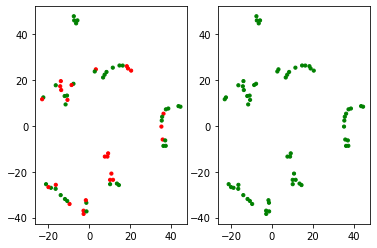

In [19]:
col1 = []
for i in range(0,len(y_pred)):
        if y_pred[i] == 1:
            col1.append('green')
        elif y_pred[i] == 2:
            col1.append('red')
        else:
            col1.append('blue')
fig, axs = plt.subplots(1,2)
axs[0].scatter(x,y,c=col,s=10)
axs[1].scatter(x,y,c=col1, s=10)

KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_train)
rate_metrics(y_train, y_pred)

y_pred = knn.predict(X_test)
rate_metrics(y_test, y_pred)

accuracy:  0.9836065573770492
recall:  0.9830927051671732
precision:  0.971449758991472
f1:  0.9771085467679894
accuracy:  0.6129032258064516
recall:  0.5654054054054054
precision:  0.5858156028368795
f1:  0.5571428571428572


In [33]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rate_metrics(y_test, y_pred)

accuracy:  0.6612903225806451
recall:  0.6124324324324324
precision:  0.6547619047619048
f1:  0.6072398190045248


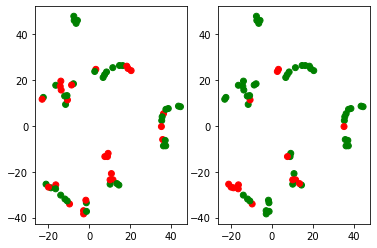

In [24]:
col2 =[]
for i in range(0,len(y_pred)):
        if y_pred[i] == 1:
            col2.append('green')
        elif y_pred[i] == 2:
            col2.append('red')
        else:
            col2.append('blue')
fig, axs = plt.subplots(1,2)
axs[0].scatter(x,y,c=col)
axs[1].scatter(x,y,c=col2)

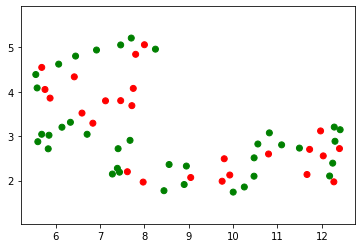

In [25]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = col
)
plt.gca().set_aspect('equal', 'datalim')

Random Forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_train)
rate_metrics(y_train, y_pred)
y_pred = rf.predict(X_test)
rate_metrics(y_test, y_pred)

accuracy:  0.9836065573770492
recall:  0.9642857142857143
precision:  0.9895833333333333
f1:  0.9762183235867448
accuracy:  0.6129032258064516
recall:  0.5459459459459459
precision:  0.5890985324947589
f1:  0.5137254901960784


In [28]:
print_best_params(RandomForestClassifier(), {'n_estimators': [100, 2000], 
                   'max_depth': [5, 15], 
                   'min_samples_split': [6, 18], 
                   'min_samples_leaf': [3, 9]},
                  'accuracy', X_train, y_train)

{'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 18, 'n_estimators': 100}


In [30]:
rf = RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=2000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rate_metrics(y_test, y_pred)

accuracy:  0.5967741935483871
recall:  0.5194594594594595
precision:  0.5535714285714286
f1:  0.4623655913978495


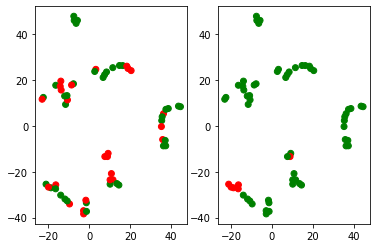

In [31]:
col3 =[]
for i in range(0,len(y_pred)):
        if y_pred[i] == 1:
            col3.append('green')
        elif y_pred[i] == 2:
            col3.append('red')
        else:
            col3.append('blue')
fig, axs = plt.subplots(1,2)
axs[0].scatter(x,y,c=col)
axs[1].scatter(x,y,c=col3)

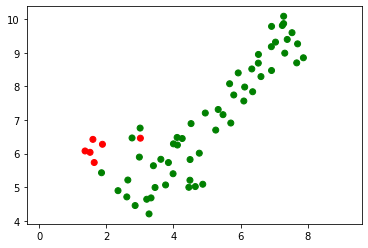

In [32]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = col3
)
plt.gca().set_aspect('equal', 'datalim')